In [5]:
## load libraries
import spacy
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

!python3 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 50.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [6]:
## connect to drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
import os

# Path to the CSV and folder with text files
txt_folder = "/content/drive/Shareddrives/NDC_txts"
csv_path = "/content/drive/Shareddrives/NDC_txts/Reg_NDC_1.csv"

# Loading the CSV
df = pd.read_csv(csv_path)

# Function to read text from file
def read_text(filename):
    file_path = os.path.join(txt_folder, filename)
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            return f.read()
    except FileNotFoundError:
        return None  # or return "" if you prefer an empty string

# Applying the function to the 'filename' column
df["text_content"] = df["filename"].apply(read_text)

KeyboardInterrupt: 

In [ ]:
df["text_content"]

,text_content
0,1 \n \n \n \n \n \n \nISLAMIC REPUBLIC OF AFGH...
1,\n1\nALBANIA REVISED NDC \nALBANIA REVISED ND...
2,1 \n \n \n \n \n \n \nThe People’s Democratic ...
3,Third contribution\ndetermined at the\nAndorra...
4,Nationally Determined Contribution (NDC) of An...
...,...
189,Vanuatu’s Revised and Enhanced\n1st Nationally...
190,Nationally Determined Contribution\nNationally...
191,SOCIALIST REPUBLIC OF VIET NAM\nNATIONALLY DET...
192,REPUBLIC OF ZAMBIA\n1.0 Background\nThis docum...


In [ ]:
from tqdm import tqdm
import spacy

nlp = spacy.load("en_core_web_sm")
nlp.max_length = 2000000

def normalize_multi_phrase_count(df, phrases, normalization="word_count"):
    phrases = [phrase.lower() for phrase in phrases]

    phrase_counts = {phrase: [] for phrase in phrases}

    for text in tqdm(df["text_content"]):
        doc = nlp(text.lower())
        doc_text = doc.text

        if normalization == "doc_length":
            total = len(text)

        elif normalization == "word_count":
            total = sum(1 for token in doc if not token.is_punct and not token.is_space)

        elif normalization == "nonstopword_count":
            total = sum(1 for token in doc if not token.is_punct and not token.is_space and not token.is_stop)

        else:
            raise ValueError(f"Unknown normalization option: {normalization}")

        for phrase in phrases:
          raw_count = doc.text.count(phrase)
          normalized_count = raw_count / total if total > 0 else 0
          phrase_counts[phrase].append(normalized_count)

    # Create the new column

    for phrase in phrases:
        col_name = f"{phrase.replace(' ', '_')}_count_normalized"
        df[col_name] = phrase_counts[phrase]
        print(f"Column '{col_name}' created successfully.")

    return df

In [ ]:
phrases = ["private sector", "sustainable development"]
df = normalize_multi_phrase_count(df, phrases, normalization = 'nonstopword_count')

In [ ]:
df

,Code,Party,Income level,GDP USD Mar 2025,Human Development Index 2022,Region Name,Sub-region Name,Least Developed Countries (LDC),Small Island Developing States (SIDS),OECD,...,Version,Status,SubmissionDate,EncodedAbsUrl,OriginalFilename,filename,text_content,planetary_boundaries_count_normalized,fossil_fuels_count_normalized,steady_state_count_normalized
0,AFG,Afghanistan,Low income,1.723305e+10,0.462,Asia,Southern Asia,1.0,0.0,0,...,1.0,Active,2016-11-23,https://unfccc.int/sites/default/files/NDC/202...,INDC_AFG_20150927_FINAL.pdf,Afghanistan.txt,1 \n \n \n \n \n \n \nISLAMIC REPUBLIC OF AFGH...,0.0,0.000834,0.0
1,ALB,Albania,Upper middle income,2.354718e+10,0.789,Europe,Southern Europe,0.0,0.0,0,...,2.0,Active,2021-10-12,https://unfccc.int/sites/default/files/2022-08...,Albania Revised NDC.pdf,Albania.txt,\n1\nALBANIA REVISED NDC \nALBANIA REVISED ND...,0.0,0.000031,0.0
2,DZA,Algeria,Upper middle income,2.476262e+11,0.745,Africa,Northern Africa,0.0,0.0,0,...,1.0,Active,2016-10-20,https://unfccc.int/sites/default/files/NDC/202...,Algeria - INDC (English unofficial translation...,Algeria.txt,1 \n \n \n \n \n \n \nThe People’s Democratic ...,0.0,0.000000,0.0
3,AND,Andorra,High income,3.785067e+09,0.884,Europe,Southern Europe,0.0,0.0,0,...,NaN,Active,2025-02-05,https://unfccc.int/sites/default/files/2025-02...,NDC 3.0 ANDORRA.pdf,Andorra.txt,Third contribution\ndetermined at the\nAndorra...,0.0,0.000428,0.0
4,AGO,Angola,Lower middle income,8.482465e+10,0.591,Africa,Sub-Saharan Africa,1.0,0.0,0,...,2.0,Active,2021-05-31,https://unfccc.int/sites/default/files/NDC/202...,NDC Angola.pdf,Angola.txt,Nationally Determined Contribution (NDC) of An...,0.0,0.000183,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,VUT,Vanuatu,Lower middle income,1.126313e+09,0.614,Oceania,Melanesia,0.0,1.0,0,...,3.0,Active,2022-08-09,https://unfccc.int/sites/default/files/NDC/202...,Vanuatu NDC Revised and Enhanced.pdf,Vanuatu.txt,Vanuatu’s Revised and Enhanced\n1st Nationally...,0.0,0.000255,0.0
190,VEN,Venezuela (Bolivarian Republic of),NaN,NaN,0.699,Americas,Latin America and the Caribbean,0.0,0.0,0,...,2.0,Active,2021-11-09,https://unfccc.int/sites/default/files/NDC/202...,Actualizacion NDC Venezuela.pdf,Venezuela.txt,Nationally Determined Contribution\nNationally...,0.0,0.000168,0.0
191,VNM,Viet Nam,Lower middle income,4.297170e+11,0.726,Asia,South-eastern Asia,0.0,0.0,0,...,3.0,Active,2022-11-08,https://unfccc.int/sites/default/files/NDC/202...,Viet Nam NDC 2022 Update.pdf,Viet_Nam.txt,SOCIALIST REPUBLIC OF VIET NAM\nNATIONALLY DET...,0.0,0.000000,0.0
192,ZMB,Zambia,Lower middle income,2.757796e+10,0.569,Africa,Sub-Saharan Africa,1.0,0.0,0,...,NaN,Active,2025-03-10,https://unfccc.int/sites/default/files/2025-03...,Provisional NDC Submission_Zambia_Revised and ...,Zambia.txt,REPUBLIC OF ZAMBIA\n1.0 Background\nThis docum...,0.0,0.000000,0.0


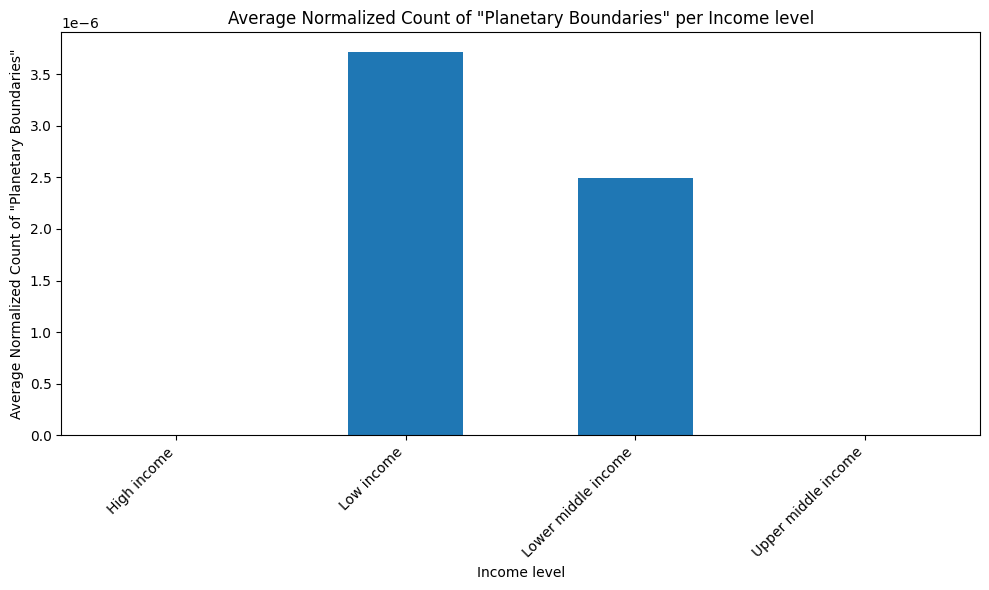

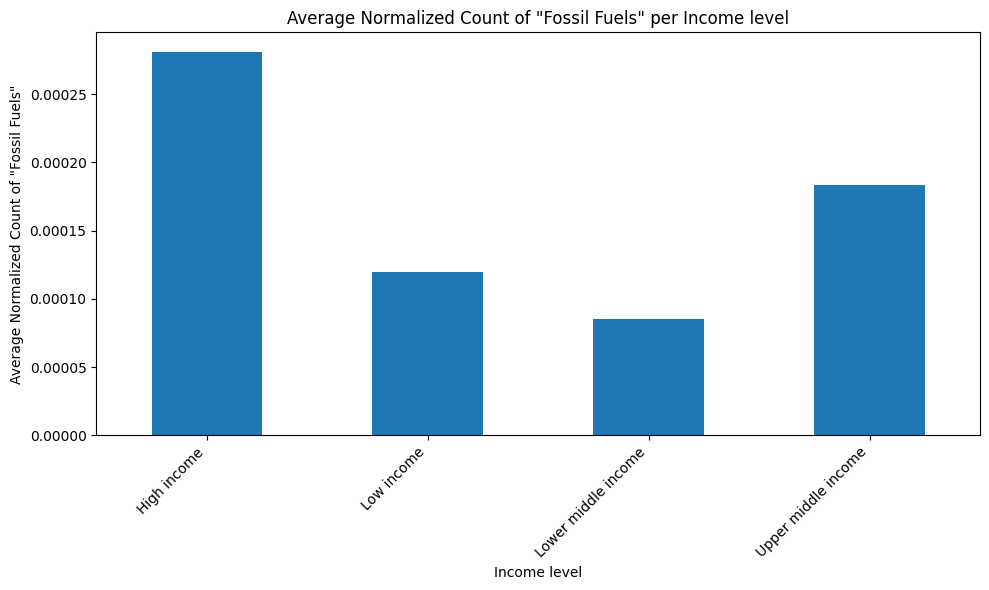

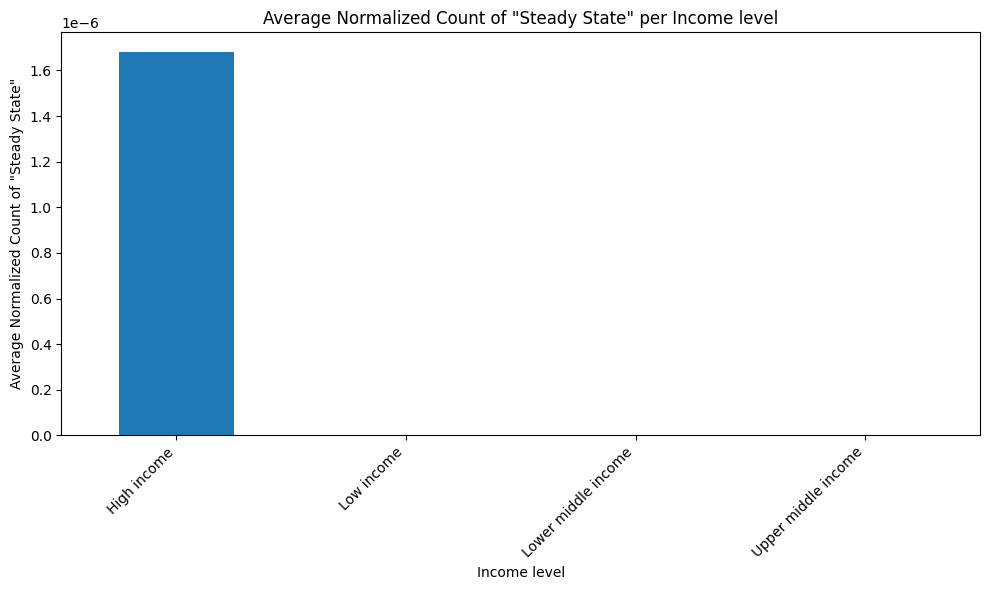

In [ ]:
import matplotlib.pyplot as plt

# Define your phrases list
phrases = ["planetary_boundaries", "fossil_fuels", "steady_state"]

# Assuming 'Party' is a column in your DataFrame 'df'
# Loop through each phrase and calculate the mean of its normalized count grouped by 'Party'

for phrase in phrases:
    # Directly use the correct column names based on the phrase
    phrase_normalized_col = f"{phrase}_count_normalized"

    # Check if the column exists in the dataframe
    if phrase_normalized_col not in df.columns:
        print(f"Column '{phrase_normalized_col}' not found in the DataFrame.")
        continue

    # Group by 'Party' and calculate the mean normalized count for this phrase
    phrase_growth_counts = df.groupby('Income level')[phrase_normalized_col].mean()

    # Plot the result
    plt.figure(figsize=(10, 6))
    phrase_growth_counts.plot(kind='bar')
    plt.title(f'Average Normalized Count of "{phrase.replace("_", " ").title()}" per Income level')
    plt.xlabel('Income level')
    plt.ylabel(f'Average Normalized Count of "{phrase.replace("_", " ").title()}"')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()



In [ ]:
import pandas as pd
import plotly.express as px

# Assuming your DataFrame is called 'df' and has the correct columns like:
# - "Code" (Country ISO alpha-3 codes)
# - "planetary_boundaries_count_normalized", "fossil_fuels_count_normalized", etc.
phrases = ["planetary_boundaries", "fossil_fuels", "steady_state"]

# Loop through each phrase and create a choropleth map
for phrase in phrases:
    # Construct the column name for the phrase
    phrase_normalized_col = f"{phrase}_count_normalized"

    # Check if the column exists in the DataFrame
    if phrase_normalized_col not in df.columns:
        print(f"Column '{phrase_normalized_col}' not found in the DataFrame.")
        continue

    # Create the choropleth map for the phrase
    fig = px.choropleth(
        df,
        locations="Code",               # Column with ISO alpha-3 codes
        color=phrase_normalized_col,    # Use the specific phrase's normalized count
        hover_name="Party",             # Info displayed on hover
        color_continuous_scale="Viridis", # You can change the color scale (e.g., 'Blues', 'Plasma', etc.)
        title=f"Average Normalized Count of '{phrase.replace('_', ' ').title()}' by Country",  # Title with phrase
        projection="natural earth"      # Style of map projection
    )

    # Show the map after the loop is completed
    fig.show()



In [ ]:
from tqdm import tqdm
import spacy

nlp = spacy.load("en_core_web_sm")
nlp.max_length = 2000000

def find_countries_with_phrase(df, phrase):
    phrase = phrase.lower()  # Ensure the phrase is in lowercase

    countries_with_phrase = []

    # Iterate over the DataFrame rows
    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        text = row["text_content"]
        country = row["Party"]  # Replace 'Country' with your actual column name for countries/parties

        # Process the text content
        doc = nlp(text.lower())
        doc_text = doc.text

        # Count occurrences of the phrase in the text
        raw_count = doc_text.count(phrase)

        # If the raw count is greater than 0, add the country to the list
        if raw_count > 0:
            countries_with_phrase.append(country)

    return countries_with_phrase

# Example usage:
phrase = "planetary boundaries"
countries = find_countries_with_phrase(df, phrase)

# Display the list of countries
print("Countries with 'planetary boundaries' in their NDCs:", countries)



100%|██████████| 194/194 [10:36<00:00,  3.28s/it]

Countries with 'planetary boundaries' in their NDCs: ['Cabo Verde', 'Liberia']
